In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from process_results.results_utils import DATASETS, DEFAULT_METRIC, to_dataframe

def plot_heatmap(df):
    df["score_str"] =  df.best_metric.map(lambda x: f"{x*100:.1f}\n") + df.last3_mean.map(lambda x: f"{x*100:.1f}") + df.last3_std.map(lambda x: f" ± {x*100:.1f}")
    sns.heatmap(df.pivot("lr","batch_size","best_metric"), annot=df.pivot("lr","batch_size","score_str"),fmt="")
    plt.show()

def logfile_paths(dataset):
    return glob.glob(f"../../checkpoints/finetune/bert_base/{dataset}/**/log",recursive=True)

# for dataset in DATASETS:
#     for logfile in logfile_paths(dataset):
#         df = to_dataframe(logfile, metric=DEFAULT_METRIC[dataset])
#         plot_heatmap(df)

/local/scratch-3/fwe21/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
for dataset in DATASETS:
    score = to_dataframe(logfile_paths(dataset)[0], metric=DEFAULT_METRIC[dataset])["best_metric"].max()
    print(f"{dataset}: {score}")

KeyError: 'F1'

/tmp/ipykernel_1667238/2316070801.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df.pivot("lr","batch_size","best_metric"), annot=df.pivot("lr","batch_size","score_str"),fmt="")


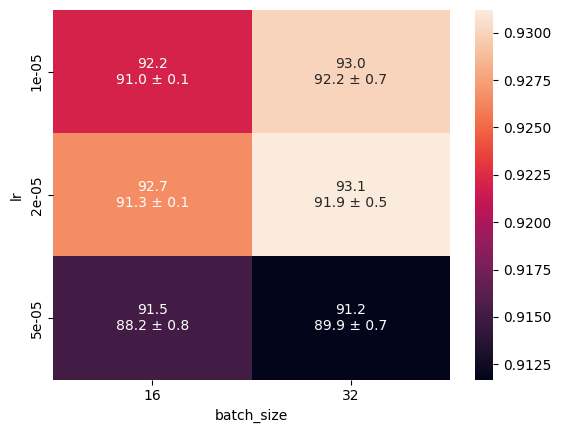

In [4]:
df = to_dataframe(f"../../checkpoints/finetune/bert-small/SST-2/seed1/log", metric=DEFAULT_METRIC["SST-2"])
plot_heatmap(df)